# Analysis and Visualization of METABRIC Breast Cancer Dataset

### Introduction 
Most of us know that someone who struggled with breast cancer, or at least heard about the struggles that patient facing patients who are fighting against breast cancer disease. Breast Cancer is one of the most commonly and frequently occurring type of cancer among women effecting about 2 millions of women in a single year and it is estimated that near about 626,000 women died from breast cancer alone in 2018.

Diseases like cancer are interconnected with the genetic malfunctioning also called as gene mutation. mainly happens when some of the cells present in women breast start to grow and divide abnormally than that of healthy cells.

### About the Dataset
The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database is a Canadian Project which contains targeted sequencing data of 1,900+ primary breast cancer samples.The dataset contains both the clinical and genomic data that was downloaded from kaggle.com.

Dataset: 
https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/download?datasetVersionNumber=1

The dataset is divided into two parts But for this research we will only use the Clinical Dataset:
1) Clinical attributes

The clinical data includes the clinical treatment, cancer and patient details.

2) Genomic attributes

The genetics part of the dataset contains m-RNA levels z-score(The number of standard deviations away from the mean of expression in the reference population) for 331 genes, and mutation for 175 genes.

Formula for calculating z-score :

z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample

## Downloading the Dataset

So Now first of all download our dataset and have a quite view how it looks 

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/download?datasetVersionNumber=1' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "breast-cancer-data-analysis-project" 

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sherax139/breast-cancer-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sherax139/breast-cancer-data-analysis-project


'https://jovian.ai/sherax139/breast-cancer-data-analysis-project'

## Data Preparation and Cleaning

In this step we are actually loading our cancer dataset into a DataFrame using Pandas which is a powerful library of python. After that we explore and analyze our data, how it is arranged, explore about the number of rows and number of columns in dataset. Then we cleaned our data which involve handling missing, incorrect and invalid values in dataset.



In [3]:
import pandas as pd

In [4]:
bcancer_df = pd.read_csv("metabric_rna_mutation.csv")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
bcancer_df.sample(20)

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
328          487             57.36      BREAST CONSERVING  Breast Cancer   
592         2947             36.47             MASTECTOMY  Breast Cancer   
1353        5421             68.00      BREAST CONSERVING  Breast Cancer   
266          406             69.32             MASTECTOMY  Breast Cancer   
877         4603             42.79      BREAST CONSERVING  Breast Cancer   
1827        7193             76.65             MASTECTOMY  Breast Cancer   
1368        5442             44.93      BREAST CONSERVING  Breast Cancer   
1479        5624             55.43      BREAST CONSERVING  Breast Cancer   
786         4119             65.46             MASTECTOMY  Breast Cancer   
515         2745             46.85             MASTECTOMY  Breast Cancer   
1639        6283             73.07             MASTECTOMY  Breast Cancer   
672         3292             60.04      BREAST CONSERVING  Breast Cancer   
795         4148             57.85             MASTECTOMY  Breast Cancer   
961         4743             52.61             MASTECTOMY  Breast Cancer   
1031        4878             79.35             MASTECTOMY  Breast Cancer   
1699        7034             78.73             MASTECTOMY  Breast Cancer   
540         2793             67.62             MASTECTOMY  Breast Cancer   
514         2744             45.57             MASTECTOMY  Breast Cancer   
491         2618             66.22      BREAST CONSERVING  Breast Cancer   
1382        5464             65.58      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
328            Breast Invasive Ductal Carcinoma         Low             0   
592            Breast Invasive Ductal Carcinoma    Moderate             0   
1353           Breast Invasive Ductal Carcinoma        High             0   
266            Breast Invasive Ductal Carcinoma    Moderate             1   
877            Breast Invasive Ductal Carcinoma    Moderate             0   
1827           Breast Invasive Ductal Carcinoma    Moderate             0   
1368           Breast Invasive Ductal Carcinoma        High             1   
1479           Breast Invasive Ductal Carcinoma        High             1   
786            Breast Invasive Ductal Carcinoma    Moderate             0   
515   Breast Mixed Ductal and Lobular Carcinoma        High             0   
1639          Breast Invasive Lobular Carcinoma         Low             0   
672            Breast Invasive Ductal Carcinoma    Moderate             0   
795            Breast Invasive Ductal Carcinoma    Moderate             0   
961   Breast Mixed Ductal and Lobular Carcinoma    Moderate             0   
1031           Breast Invasive Ductal Carcinoma    Moderate             0   
1699           Breast Invasive Ductal Carcinoma    Moderate             0   
540            Breast Invasive Ductal Carcinoma        High             0   
514           Breast Invasive Lobular Carcinoma         NaN             0   
491            Breast Invasive Ductal Carcinoma        High             0   
1382           Breast Invasive Ductal Carcinoma    Moderate             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
328                       Normal     1.0                   Positve  ...   
592                         LumA     2.0                   Positve  ...   
1353                       Basal     3.0                  Negative  ...   
266                         LumB     1.0                   Positve  ...   
877                       Normal     3.0                   Positve  ...   
1827                        LumB     4.0                   Positve  ...   
1368                       Basal     3.0                  Negative  ...   
1479                       Basal     3.0                  Negative  ...   
786                         Her2     3.0                   Positve  ...   
515                         LumA     2.0 

In [17]:
clinical_df = bcancer_df[["patient_id", "age_at_diagnosis", "type_of_breast_surgery", "cancer_type_detailed", "cellularity", "cohort", "er_status", "tumor_size", "neoplasm_histologic_grade", "primary_tumor_laterality", "lymph_nodes_examined_positive","mutation_count", "overall_survival_months"]]

In [7]:
clinical_df

patient_id  age_at_diagnosis type_of_breast_surgery  \
0              0             75.65             MASTECTOMY   
1              2             43.19      BREAST CONSERVING   
2              5             48.87             MASTECTOMY   
3              6             47.68             MASTECTOMY   
4              8             76.97             MASTECTOMY   
...          ...               ...                    ...   
1899        7295             43.10      BREAST CONSERVING   
1900        7296             42.88             MASTECTOMY   
1901        7297             62.90             MASTECTOMY   
1902        7298             61.16             MASTECTOMY   
1903        7299             60.02      BREAST CONSERVING   

                           cancer_type_detailed cellularity  cohort er_status  \
0              Breast Invasive Ductal Carcinoma         NaN     1.0  Positive   
1              Breast Invasive Ductal Carcinoma        High     1.0  Positive   
2              Breast Invasive Ductal Carcinoma        High     1.0  Positive   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate     1.0  Positive   
4     Breast Mixed Ductal and Lobular Carcinoma        High     1.0  Positive   
...                                         ...         ...     ...       ...   
1899          Breast Invasive Lobular Carcinoma        High     4.0  Positive   
1900           Breast Invasive Ductal Carcinoma        High     4.0  Positive   
1901           Breast Invasive Ductal Carcinoma        High     4.0  Positive   
1902           Breast Invasive Ductal Carcinoma    Moderate     4.0  Positive   
1903           Breast Invasive Ductal Carcinoma        High     4.0  Positive   

      tumor_size  neoplasm_histologic_grade primary_tumor_laterality  \
0           22.0                        3.0                    Right   
1           10.0                        3.0                    Right   
2           15.0                        2.0                    Right   
3           25.0                        2.0                    Right   
4           40.0                        3.0                    Right   
...          ...                        ...                      ...   
1899        25.0                        3.0                    Right   
1900        20.0                        3.0                      NaN   
1901        25.0                        3.0                     Left   
1902        25.0                        2.0                      NaN   
1903        20.0                        3.0                      NaN   

      lymph_nodes_examined_positive  mutation_count  overall_survival_months  
0                              10.0             NaN               140.500000  
1                               0.0             2.0                84.633333  
2                               1.0             2.0               163.700000  
3                               3.0             1.0               164.933333  
4                               8.0             2.0                41.366667  
...                             ...             ...                      ...  
1899                            1.0             4.0               196.866667  
1900                            1.0             6.0                44.733333  
1901                           45.0             4.0               175.966667  
1902                           12.0            15.0                86.233333  
1903                            1.0             3.0               201.900000  

[1904 rows x 13 columns]

In [52]:
clinical_df.describe()

patient_id  age_at_diagnosis       cohort   tumor_size  \
count  1904.000000       1904.000000  1904.000000  1884.000000   
mean   3921.982143         61.087054     2.643908    26.238726   
std    2358.478332         12.978711     1.228615    15.160976   
min       0.000000         21.930000     1.000000     1.000000   
25%     896.500000         51.375000     1.000000    17.000000   
50%    4730.500000         61.770000     3.000000    23.000000   
75%    5536.250000         70.592500     3.000000    30.000000   
max    7299.000000         96.290000     5.000000   182.000000   

       neoplasm_histologic_grade  lymph_nodes_examined_positive  \
count                1832.000000                    1904.000000   
mean                    2.415939                       2.002101   
std                     0.650612                       4.079993   
min                     1.000000                       0.000000   
25%                     2.000000                       0.000000   
50%                     3.000000                       0.000000   
75%                     3.000000                       2.000000   
max                     3.000000                      45.000000   

       mutation_count  overall_survival_months  
count     1859.000000              1904.000000  
mean         5.697687               125.121324  
std          4.058778                76.334148  
min          1.000000                 0.000000  
25%          3.000000                60.825000  
50%          5.000000               115.616667  
75%          7.000000               184.716667  
max         80.000000               355.200000

## Exploratory Analysis and Visualization



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [8]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

So, we have mainly two types of breast surgery Mastectomy and breast conserving. Let's see how much of the patients have respective breast surgeries.

In [27]:
clinical_df["type_of_breast_surgery"].value_counts()

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

We can see that about 1127 out of 1905 patients have done mastectomy and 755 of them have done Breast conserving surgery.

#### Similarly discussing about cancer type , let see how much patients have which type of cancer

In [28]:
clinical_df["cancer_type_detailed"].unique()

clinical_df["cancer_type_detailed"].value_counts()

Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64

Out of 1900, 1500 patients have Breast Invasive Ductal Carcinoma and only 1 patient have faced Metaplastic Breast cancer 

 By visulizing the barplot between Number of mutation and Tumor size, One can clearly analyze that tumor size is between 20-30 for all the mutation counts in all patients.

In [29]:
plt.title('Comparision of tumor size and no. of mutation')
sns.barplot(x = "mutation_count", y = "tumor_size", data = clinical_df);

Same as the above we can see barplot between Number of mutation and Tumor size, but now with respect to Estrogen Receptor (Either patient have given estrogen receptor or not)

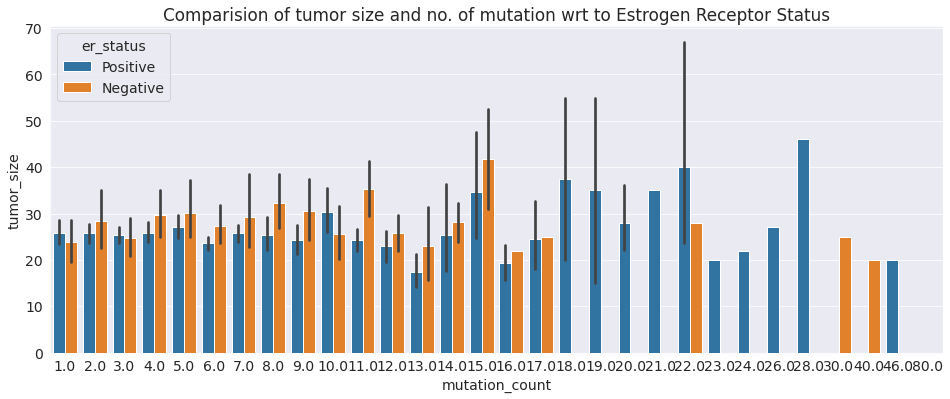

In [30]:
plt.title('Comparision of tumor size and no. of mutation wrt to Estrogen Receptor Status')
sns.barplot(x = "mutation_count", y = "tumor_size", hue = "er_status", data = clinical_df);

So now, we analyzed t distribute the dataset with respect to two parameters. First is the age at which the diagnosis of patient stated and other is the survival rate in months.

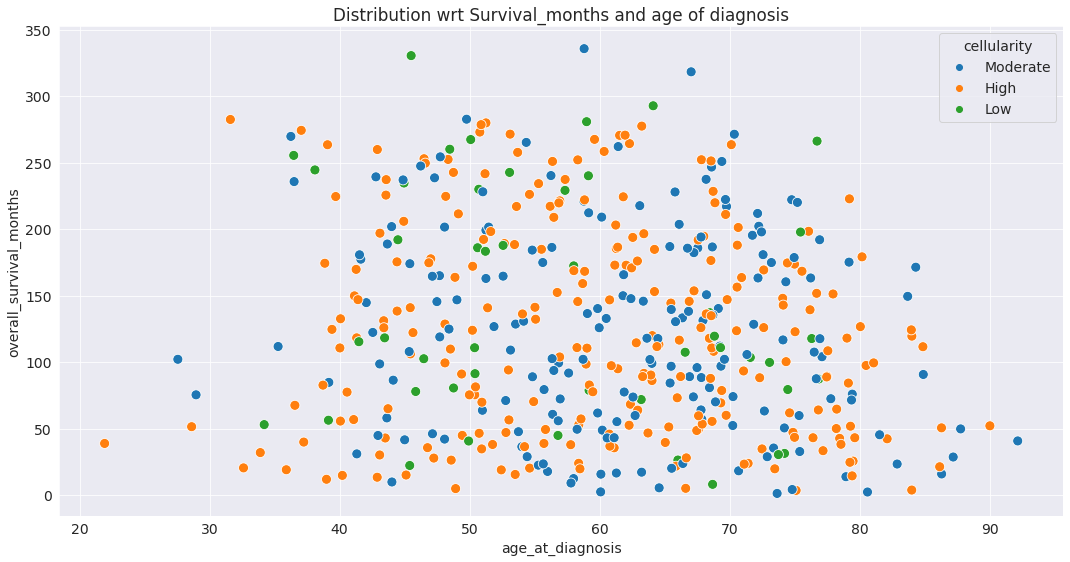

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize = (18, 9))
plt.title('Distribution wrt Survival_months and age of diagnosis')
sns.scatterplot(x='age_at_diagnosis', 
                y='overall_survival_months', 
                hue = "cellularity",
                s=100,
                data=clinical_df.sample(500));

We can see that those how have done their diagnosis between 40 - 80 years have survived not greater than 250 months.

## Asking and Answering Questions

Now let's analyze more about our data by answering some important questions.


#### Q1: What is the ratio of breast cancer between left and right breast

In [35]:
clinical_df["primary_tumor_laterality"].value_counts()

Left     935
Right    863
Name: primary_tumor_laterality, dtype: int64

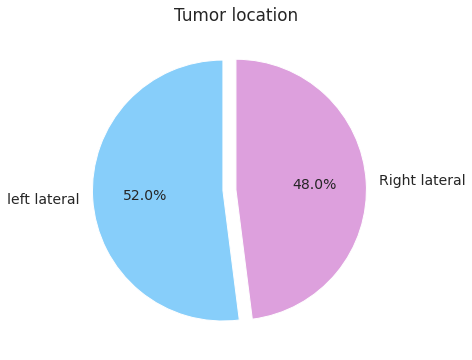

In [57]:
labels = ['left lateral','Right lateral']
data = clinical_df["primary_tumor_laterality"].value_counts()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Tumor location")
plt.pie(data, labels = labels,autopct ='%.1f%%', startangle = 90, explode = [0.1, 0], colors = ['lightskyblue', 'plum'])
plt.show();

 We can see in the above pie chart the ratio of tumor location between the patients

#### Q2: What is the average size of tumor in all the samples? Describe by plotting a graph.

In [84]:
plt.plot(clinical_df.tumor_size);
plt.title("Tumor size distribution");

In [75]:
clinical_df.tumor_size.max()

182.0

We can see that most of the patients have the tumor size between 10-50 mm. The maximum tumor size is about 180mm and minimum of 1-2 mm.

#### Q3: What is the Cellularity in Breast cancer and how it is distributed across the samples?

Cellularity is defined as the percentage of the area which is covered by malignant epithelial cell. In our dataset  as show in the pie plot about half of patients have high cellularity level. and 38% have moderate and 11% patients have low level of Cellularity (percentage of the area of malignant epithelial cell)

In [32]:
clinical_df.cellularity.value_counts()

High        939
Moderate    711
Low         200
Name: cellularity, dtype: int64

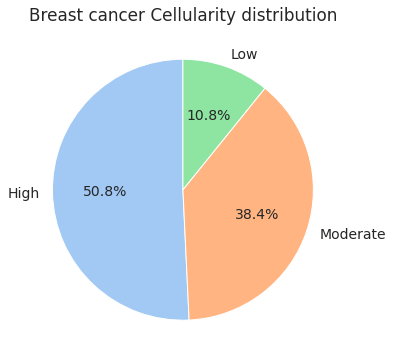

In [51]:
topic = ["High", "Moderate", "Low"]
data = clinical_df["cellularity"].value_counts()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Breast cancer Cellularity distribution")
plt.pie(data,labels = topic, colors = colors, startangle = 90, autopct='%.1f%%')
plt.show()

#### Q4: What is the average year of overall survival of patients, also find out minimum and maximum age.

In [32]:
Average = (clinical_df["overall_survival_months"]/12).mean()
print("The Average year of survival of patients are:  {:.2f} years.".format(Average))

The Average year of survival of patients are:  10.43 years.


In [34]:
Minimum = (clinical_df["overall_survival_months"]/12).min()
Maximum = (clinical_df["overall_survival_months"]/12).max()
print("The Minimum year of survival of patients is :  {:.2f} years and the maximum years is :{:.2f}".format(Minimum, Maximum))

The Minimum year of survival of patients is :  0.00 years and the maximum years is :29.60


#### Q5: Find out the relationship between Neoplasm Histological grade and lymph nodes that had been examined as positive.

In [48]:
clinical_df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type_detailed', 'cellularity', 'cohort', 'er_status',
       'tumor_size', 'neoplasm_histologic_grade', 'primary_tumor_laterality',
       'lymph_nodes_examined_positive', 'mutation_count',
       'overall_survival_months'],
      dtype='object')

<AxesSubplot:xlabel='neoplasm_histologic_grade', ylabel='lymph_nodes_examined_positive'>

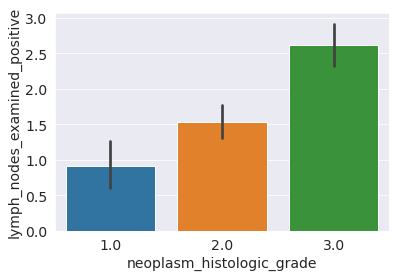

In [47]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
sns.barplot(x = clinical_df.neoplasm_histologic_grade, y = clinical_df.lymph_nodes_examined_positive);


So, here is a barplot showing the distribution   between Neoplasm Histological grade and lymph nodes that had been examined as positive. we can clearly analyze that those patients having higher neoplasm histological grade also have higher predictor of increased risk of local and distant recurrence, directly affecting mortality.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

So we did a lot of analysis to our dataset, now let's discuss about the summery what we got in our analysis report. 
we analyze that those patients having higher neoplasm histological grade also have higher predictor of increased risk of local and distant recurrence, directly affecting mortality. we can clearly see that about half of patients have high cellularity level. and 38% have moderate and 11% patients have low level of Cellularity (percentage of the area of malignant epithelial cell).  We can see that most of the patients have the tumor size between 10-50 mm. The maximum tumor size is about 180mm and minimum of 1-2 mm.  We can see that those how have done their diagnosis between 40 - 80 years have survived not greater than 250 months. We can see that about 1127 out of 1905 patients have done mastectomy and 755 of them have done Breast conserving surgery.By visulizing the barplot between Number of mutation and Tumor size, One can clearly analyze that tumor size is between 20-30 for all the mutation counts in all patients.

## References and Future Work

I will further analyze more about different cancer datasets and will use machine learning models and algorithms to predict the exact location of cancer cells. 

Here are some useful links that will helped me out in this research.

Research Paper on Breast cancer : https://www.nature.com/articles/nature18003

Other dataset on cancer genomics: https://www.cbioportal.org/

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>